**Datos de Juegos**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime as dt 
import scienceplots
plt.style.use(['science', 'notebook','grid'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests
from bs4 import BeautifulSoup



Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100,000 copias. Fue generado mediante un scraping de vgchartz.com

Fields include

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.


In [3]:
df_games=pd.read_csv("vgsales.csv")
df_ps4=pd.read_csv("PS4_GamesSales.csv", encoding='iso-8859-1')
df_xboxone=pd.read_csv("XboxOne_GameSales.csv", encoding='iso-8859-1')

In [4]:
df_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df_ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [6]:
rdr2 =df_ps4[df_ps4["Game"]=="Red Dead Redemption 2"]
rdr2

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94


In [7]:
df_ps4["Global"].mean()

0.5760541586073501

In [8]:
df_ps4["Global"].min()

0.0

In [9]:
dt_may_ps4=df_ps4[df_ps4["Global"]> df_ps4["Global"].std()]
dt_may_ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
94,NieR Automata,2017.0,Role-Playing,Square Enix,0.56,0.51,0.42,0.22,1.71
95,Tekken 7,2017.0,Fighting,Namco Bandai Games,0.60,0.72,0.12,0.26,1.70
96,Persona 5,2016.0,Role-Playing,Deep Silver,0.62,0.34,0.48,0.20,1.64
97,The Order: 1886,2015.0,Shooter,Sony Computer Entertainment,0.44,0.86,0.07,0.25,1.62


In [10]:
two_games=df_ps4.nlargest(50, 'Global')
two_games

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [11]:
df_xboxone

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [12]:
two_xbox=df_xboxone.nlargest(5,"Global")
two_xbox

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [13]:
df_ms=df_xboxone[df_xboxone["Publisher"]=="Microsoft Studios"]
df_ms

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
8,9,Halo 5: Guardians,2015.0,Shooter,Microsoft Studios,2.94,1.49,0.03,0.45,4.92
11,12,Forza Horizon 3,2016.0,Racing,Microsoft Studios,1.64,1.96,0.02,0.32,3.93
13,14,Gears of War: Ultimate Edition,2015.0,Shooter,Microsoft Studios,2.88,0.37,0.00,0.37,3.62
15,16,Halo: The Master Chief Collection,2014.0,Shooter,Microsoft Studios,2.06,1.04,0.03,0.31,3.44
17,18,Gears of War 4,2016.0,Shooter,Microsoft Studios,2.17,0.90,0.00,0.32,3.38
29,30,Forza Motorsport 5,2013.0,Racing,Microsoft Studios,1.28,0.90,0.01,0.21,2.40
33,34,PlayerUnknown's Battlegrounds,2017.0,Shooter,Microsoft Studios,1.29,0.69,0.00,0.20,2.17
36,37,Forza Motorsport 6,2015.0,Racing,Microsoft Studios,0.90,0.92,0.04,0.16,2.02
47,48,Dead Rising 3,2013.0,Action,Microsoft Studios,1.06,0.40,0.01,0.15,1.63


In [14]:
df_ps=df_ps4[df_ps4["Publisher"]=="Sony Interactive Entertainment"]
df_ps

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
17,God of War (PS4),2018.0,Action,Sony Interactive Entertainment,2.83,2.17,0.13,1.02,6.15
18,Horizon: Zero Dawn,2017.0,Action,Sony Interactive Entertainment,2.20,2.43,0.28,0.92,5.82
39,Gran Turismo Sport,2017.0,Racing,Sony Interactive Entertainment,0.63,2.35,0.24,0.54,3.77
66,Ratchet & Clank (2016),2016.0,Platform,Sony Interactive Entertainment,0.97,0.97,0.06,0.39,2.38
68,Uncharted: The Lost Legacy,2017.0,Action,Sony Interactive Entertainment,0.58,1.38,0.04,0.36,2.37
75,PlayStation VR Worlds,2016.0,Misc,Sony Interactive Entertainment,0.36,1.40,0.09,0.32,2.16
99,Detroit: Become Human,2018.0,Adventure,Sony Interactive Entertainment,0.55,0.67,0.12,0.24,1.57
114,The Last Guardian,2016.0,Action-Adventure,Sony Interactive Entertainment,0.40,0.58,0.13,0.19,1.29


**Solo Juegos de PS4**

In [15]:
#Regresión Lineal

x= df_ps4[["Europe"]]
y= df_ps4[["Rest of World"]]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)

In [20]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coef de determinación (R$^{2}$):", r2)

Error cuadrático medio (MSE): 0.003889097466272649
Coef de determinación (R$^{2}$): 0.9438523792725575


In [21]:
print("Pandiente (Coef):", model.coef_[0])
print("Interseción:", model.intercept_)

Pandiente (Coef): [0.30101303]
Interseción: [0.01504873]


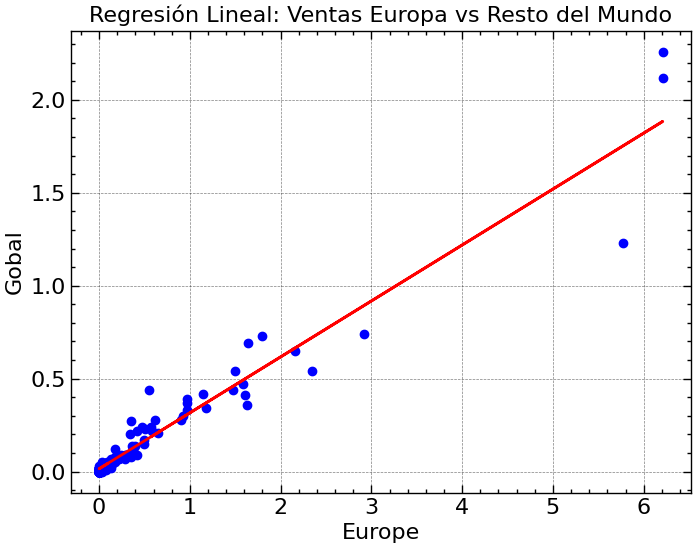

In [22]:
# Paso 7: Visualizar los resultados
plt.scatter(x_test, y_test, color='blue')  # Datos reales
plt.plot(x_test, y_pred, color='red', linewidth=2)  # Línea de regresión
plt.title("Regresión Lineal: Ventas Europa vs Resto del Mundo")
plt.xlabel("Europe")
plt.ylabel("Gobal")
plt.show()

**Histograma de Ventas de juegos a nivel mundial**

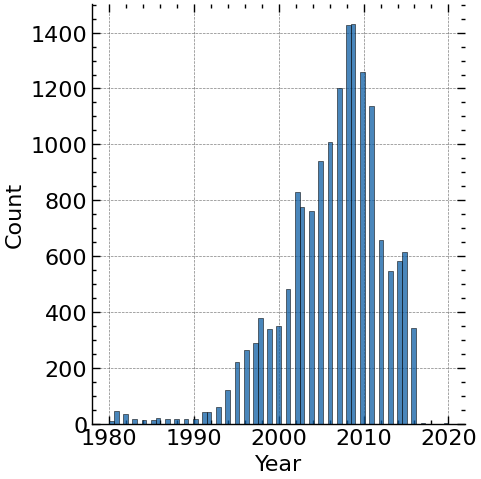

In [23]:
sns.displot(df_games["Year"], kind='hist')

**Todas las Plataformas**

Text(0.5, 1.0, 'Ventas Globales por Género')

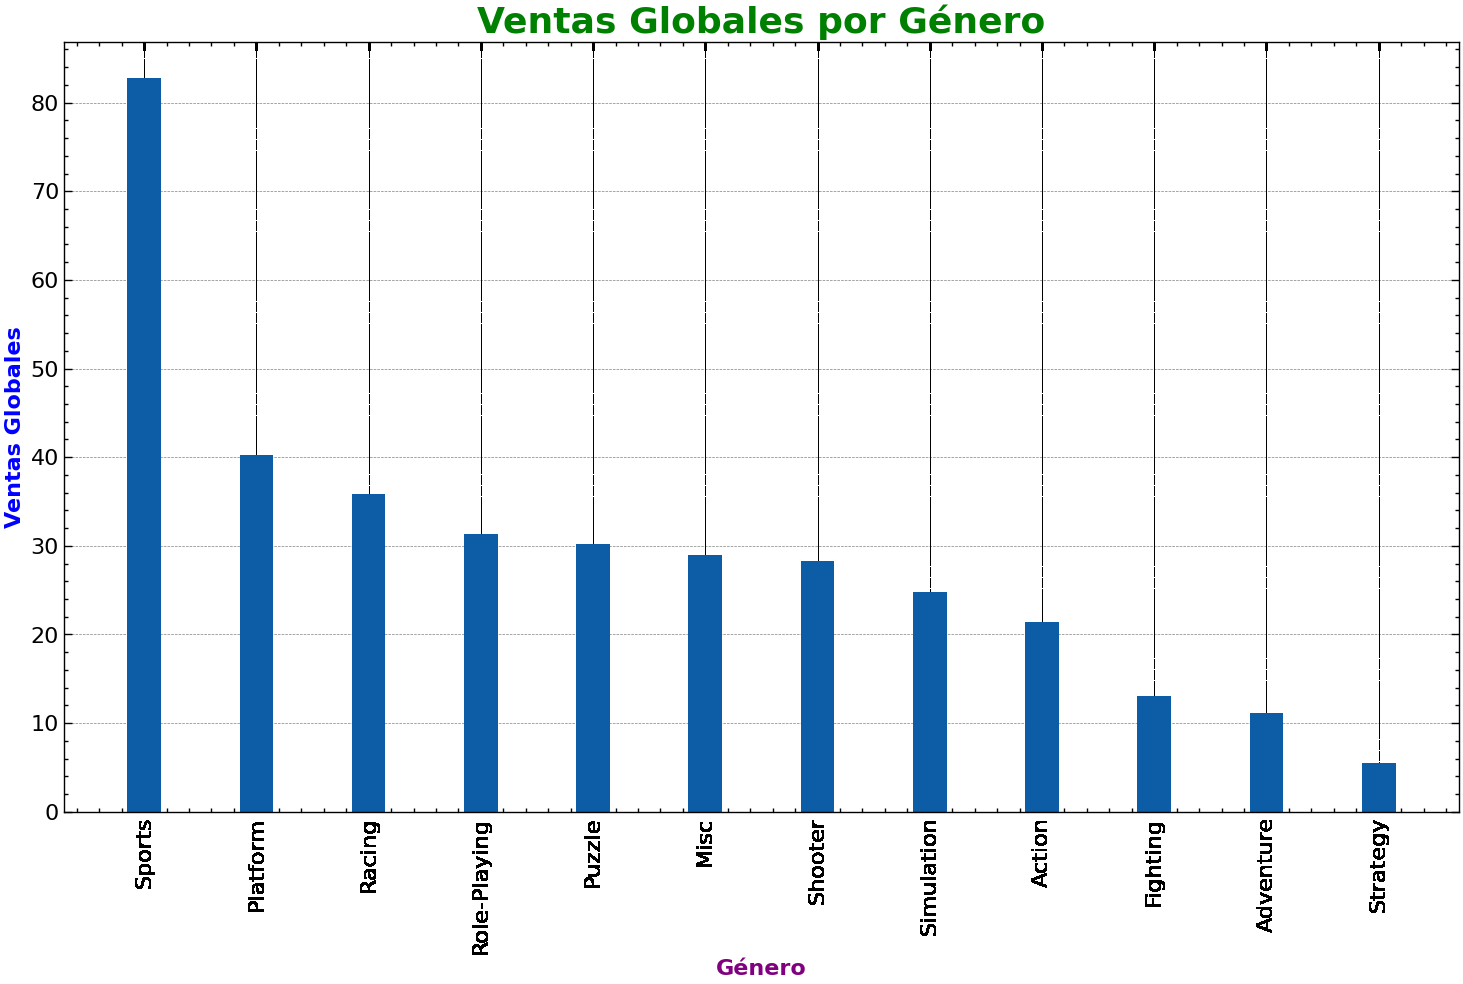

In [24]:
#gráfico de barras de las ventas globales
plt.figure(figsize=(18, 10))
plt.bar(df_games["Genre"], df_games["Global_Sales"], width=0.3)
plt.xticks(ticks=df_games["Genre"], rotation=90)
plt.xlabel('Género', color='purple', fontsize=16, fontweight='bold')
plt.ylabel('Ventas Globales', color='b', fontsize=16, fontweight='bold')
plt.title('Ventas Globales por Género', color='g', fontsize=26, fontweight='bold')

Text(0.5, 1.0, 'Ventas Globales por Plataformas')

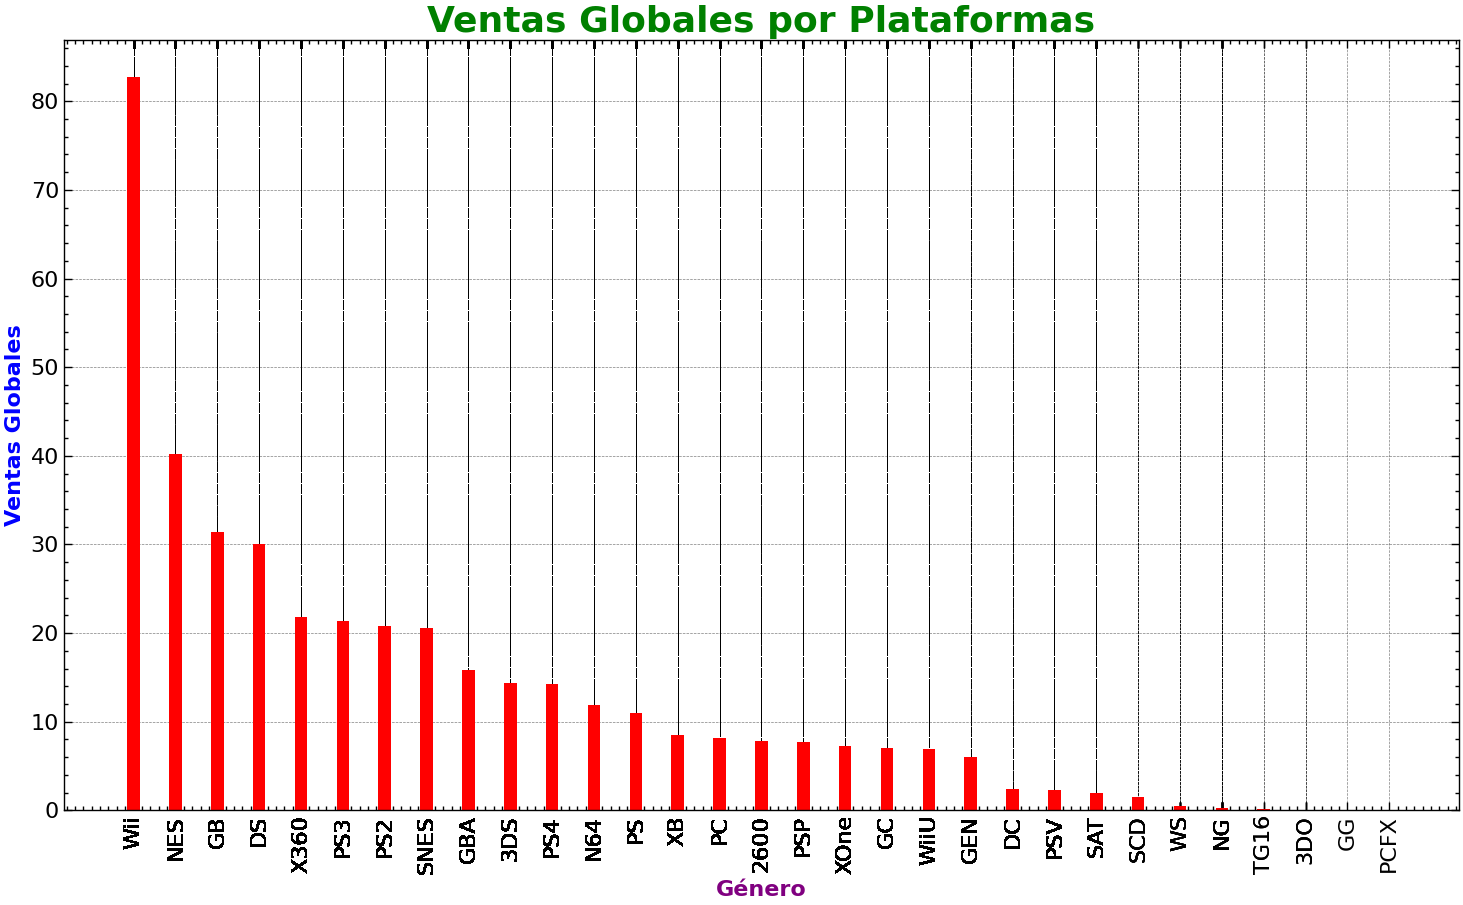

In [25]:
#gráfico de barras de las ventas globales
plt.figure(figsize=(18, 10))
plt.bar(df_games["Platform"], df_games["Global_Sales"], width=0.3, color='r')
plt.xticks(ticks=df_games["Platform"], rotation=90)
plt.xlabel('Género', color='purple', fontsize=16, fontweight='bold')
plt.ylabel('Ventas Globales', color='b', fontsize=16, fontweight='bold')
plt.title('Ventas Globales por Plataformas', color='g', fontsize=26, fontweight='bold')

Text(0.5, 1.0, 'Ventas Globales de Videojuegos por año')

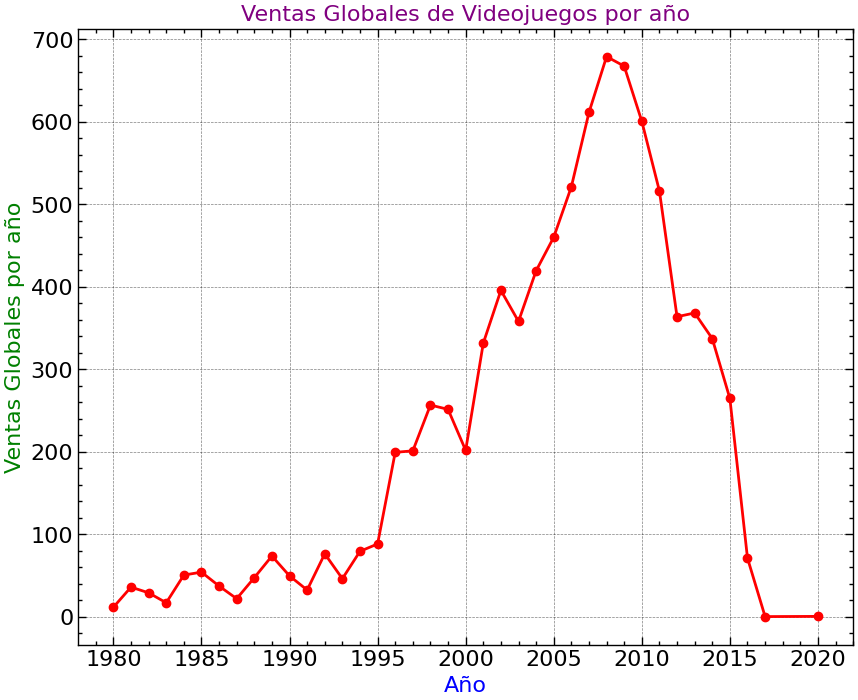

In [26]:
df_group=df_games.groupby("Year")["Global_Sales"].sum().reset_index()
plt.figure(figsize=(10,8))
plt.plot(df_group["Year"], df_group["Global_Sales"], marker='o', color='r')
plt.xlabel("Año", color='b')
plt.ylabel("Ventas Globales por año", color='g')
plt.title('Ventas Globales de Videojuegos por año', color='purple')

In [27]:
corr=df_games["EU_Sales"].corr(df_games["Global_Sales"])
corr

0.9028358134817441

In [28]:
correlation_matrix=df_games.corr()

C:\Users\sebas\AppData\Local\Temp\ipykernel_5000\1959793581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df_games.corr()


<Axes: >

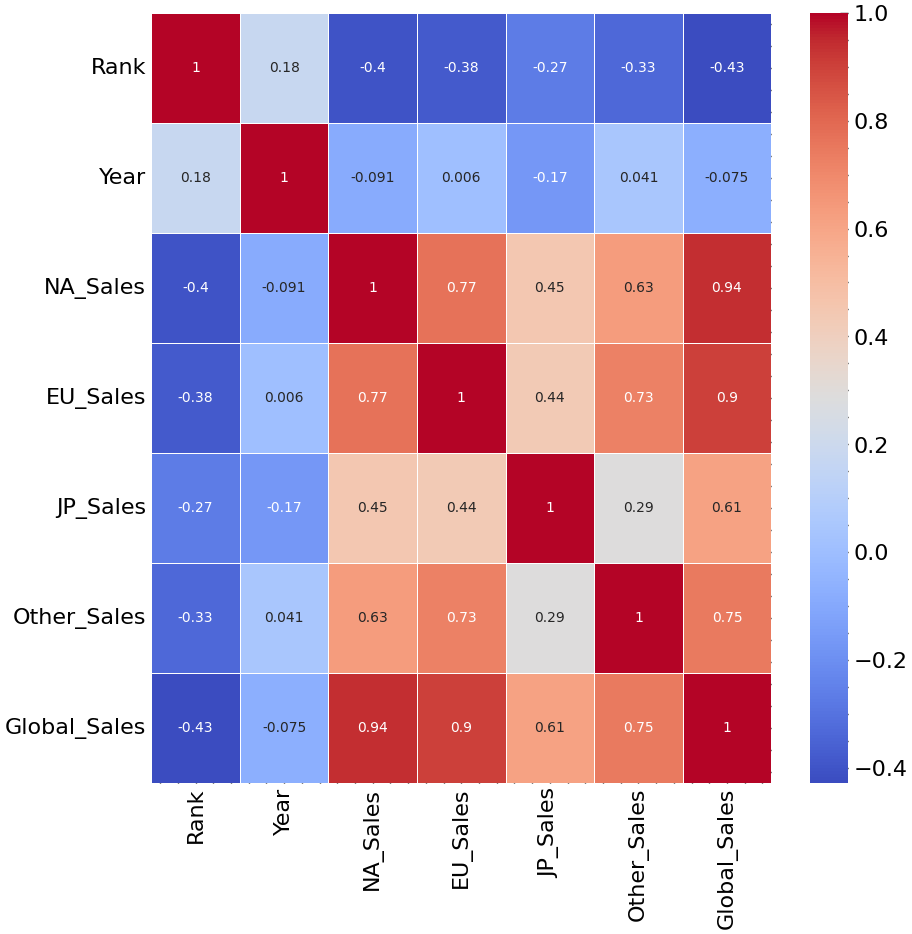

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

**Todas las plataformas**

In [30]:
df_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [31]:
#los 10 videojuegos más vendidos entre 1980-2020
top10=df_games.nlargest(10, "Global_Sales")[["Name","Platform", "Global_Sales"]]
top10

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.74
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.82
3,Wii Sports Resort,Wii,33.00
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,30.01
7,Wii Play,Wii,29.02
8,New Super Mario Bros. Wii,Wii,28.62
9,Duck Hunt,NES,28.31


In [32]:
#los 10 videojuegos más vendidos de PS4 hasta 2020
top10_ps4=df_ps4.nlargest(10,"Global")[["Game", "Publisher", "Global"]]
top10_ps4

,Game,Publisher,Global
0,Grand Theft Auto V,Rockstar Games,19.39
1,Call of Duty: Black Ops 3,Activision,15.09
2,Red Dead Redemption 2,Rockstar Games,13.94
3,Call of Duty: WWII,Activision,13.40
4,FIFA 18,EA Sports,11.80
5,FIFA 17,Electronic Arts,10.94
6,Uncharted (PS4),Sony Interactive Entertainment,10.33
7,Spider-Man (PS4),Sony Interactive Entertainment,8.76
8,Call of Duty: Infinite Warfare,Activision,8.48
9,Fallout 4,Bethesda Softworks,8.48


In [33]:
#los 10 videojuegos más vendidos de XBOXONE hasta 2020
top10_xboxone=df_xboxone.nlargest(10,"Global")[["Game", "Publisher", "Global"]]
top10_xboxone

,Game,Publisher,Global
0,Grand Theft Auto V,Rockstar Games,8.72
1,Call of Duty: Black Ops 3,Activision,7.37
2,Call of Duty: WWII,Activision,6.23
3,Red Dead Redemption 2,Rockstar Games,5.77
4,MineCraft,Microsoft Studios,5.43
5,Call of Duty: Advanced Warfare,Activision,5.22
6,Battlefield 1,Electronic Arts,5.13
7,Fallout 4,Bethesda Softworks,5.03
8,Halo 5: Guardians,Microsoft Studios,4.92
9,Call of Duty: Infinite Warfare,Activision,4.79


In [34]:
#Juegos de PS
df_ps1=df_games[df_games["Platform"]=="PS"]
df_ps1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
87,88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
...,...,...,...,...,...,...,...,...,...,...,...
16239,16242,Builder's Block,PS,1999.0,Strategy,EON Digital Entertainment,0.01,0.00,0.00,0.00,0.01
16373,16376,Meru Purana,PS,1996.0,Strategy,Gust,0.00,0.00,0.01,0.00,0.01
16506,16509,Samurai Shodown: Warrios Rage,PS,1999.0,Fighting,SNK,0.01,0.00,0.00,0.00,0.01
16518,16521,Crossroad Crisis,PS,2000.0,Puzzle,Success,0.01,0.00,0.00,0.00,0.01


In [35]:
#los 10 videojuegos más vendidos de PS
top10_ps1=df_ps1.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_ps1

,Name,Publisher,Global_Sales
52,Gran Turismo,Sony Computer Entertainment,10.95
66,Final Fantasy VII,Sony Computer Entertainment,9.72
69,Gran Turismo 2,Sony Computer Entertainment,9.49
87,Final Fantasy VIII,SquareSoft,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,Sony Computer Entertainment,7.58
105,Tekken 3,Sony Computer Entertainment,7.16
106,Crash Bandicoot 3: Warped,Sony Computer Entertainment,7.13
116,Crash Bandicoot,Sony Computer Entertainment,6.82
138,Driver,GT Interactive,6.27
145,Metal Gear Solid,Konami Digital Entertainment,6.03


In [36]:
#Juegos de PS2
df_ps2=df_games[df_games["Platform"]=="PS2"]
df_ps2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...
16559,16562,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16561,16564,Kanokon: Esuii,PS2,2008.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


In [37]:
#los 10 videojuegos más vendidos de PS2
top10_ps2=df_ps2.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_ps2

,Name,Publisher,Global_Sales
17,Grand Theft Auto: San Andreas,Take-Two Interactive,20.81
24,Grand Theft Auto: Vice City,Take-Two Interactive,16.15
28,Gran Turismo 3: A-Spec,Sony Computer Entertainment,14.98
38,Grand Theft Auto III,Take-Two Interactive,13.10
47,Gran Turismo 4,Sony Computer Entertainment,11.66
86,Final Fantasy X,Sony Computer Entertainment,8.05
104,Need for Speed Underground,Electronic Arts,7.20
113,Need for Speed Underground 2,Electronic Arts,6.90
114,Medal of Honor: Frontline,Electronic Arts,6.83
131,Kingdom Hearts,Sony Computer Entertainment,6.40


In [38]:
#Juegos de PS3
df_ps3=df_games[df_games["Platform"]=="PS3"]
df_ps3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...,...
16450,16453,Hyperdimension Neptunia mk2,PS3,2011.0,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
16451,16454,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014.0,Adventure,Views,0.00,0.00,0.01,0.00,0.01
16480,16483,Muv-Luv Alternative,PS3,2012.0,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
16521,16524,Akatsuki no Goei Trinity,PS3,2012.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


In [39]:
#los 10 videojuegos más vendidos de PS3
top10_ps3=df_ps3.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_ps3

,Name,Publisher,Global_Sales
16,Grand Theft Auto V,Take-Two Interactive,21.40
34,Call of Duty: Black Ops II,Activision,14.03
37,Call of Duty: Modern Warfare 3,Activision,13.46
40,Call of Duty: Black Ops,Activision,12.73
54,Gran Turismo 5,Sony Computer Entertainment,10.77
55,Call of Duty: Modern Warfare 2,Activision,10.69
56,Grand Theft Auto IV,Take-Two Interactive,10.57
67,Call of Duty: Ghosts,Activision,9.59
82,FIFA Soccer 13,Electronic Arts,8.24
103,Battlefield 3,Electronic Arts,7.23


In [40]:
#Juegos PSP
df_psp=df_games[df_games["Platform"]=="PSP"]
df_psp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
90,91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50
198,199,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
266,267,Daxter,PSP,2006.0,Platform,Sony Computer Entertainment,2.45,1.02,0.00,0.75,4.22
...,...,...,...,...,...,...,...,...,...,...,...
16546,16549,Hyakki Yagyou Kaidan Romance,PSP,2012.0,Action,Quinrose,0.00,0.00,0.01,0.00,0.01
16568,16571,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16571,16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,Prototype,0.00,0.00,0.01,0.00,0.01
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01


In [41]:
#los 10 videojuegos más vendidos de PSP
top10_psp=df_psp.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_psp

,Name,Publisher,Global_Sales
90,Grand Theft Auto: Liberty City Stories,Take-Two Interactive,7.72
161,Monster Hunter Freedom Unite,Capcom,5.50
198,Grand Theft Auto: Vice City Stories,Take-Two Interactive,5.08
214,Monster Hunter Freedom 3,Capcom,4.87
266,Daxter,Sony Computer Entertainment,4.22
326,Ratchet & Clank: Size Matters,Sony Computer Entertainment,3.77
340,Midnight Club 3: DUB Edition,Take-Two Interactive,3.66
413,Gran Turismo (PSP),Sony Computer Entertainment,3.27
424,Crisis Core: Final Fantasy VII,Square Enix,3.19
425,God of War: Chains of Olympus,Sony Computer Entertainment,3.19


In [42]:
#Juegos PSV
df_psv=df_games[df_games["Platform"]=="PSV"]
df_psv

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
713,715,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
1023,1025,Uncharted: Golden Abyss,PSV,2011.0,Shooter,Sony Computer Entertainment,0.59,0.75,0.13,0.27,1.74
1071,1073,Call of Duty Black Ops: Declassified,PSV,2012.0,Action,Activision,0.80,0.52,0.07,0.30,1.69
1286,1288,Assassin's Creed III: Liberation,PSV,2012.0,Action,Ubisoft,0.58,0.55,0.06,0.28,1.47
1296,1298,LittleBigPlanet PS Vita,PSV,2012.0,Platform,Sony Computer Entertainment,0.40,0.72,0.02,0.33,1.47
...,...,...,...,...,...,...,...,...,...,...,...
16548,16551,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16557,16560,Dramatical Murder Re:code,PSV,2014.0,Adventure,Nitroplus,0.00,0.00,0.01,0.00,0.01
16560,16563,Hanasaku Manimani,PSV,2014.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16565,16568,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01


In [43]:
#los 10 videojuegos más vendidos de PSV
top10_psv=df_psv.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_psv

,Name,Publisher,Global_Sales
713,Minecraft,Sony Computer Entertainment Europe,2.25
1023,Uncharted: Golden Abyss,Sony Computer Entertainment,1.74
1071,Call of Duty Black Ops: Declassified,Activision,1.69
1286,Assassin's Creed III: Liberation,Ubisoft,1.47
1296,LittleBigPlanet PS Vita,Sony Computer Entertainment,1.47
1405,Persona 4: Golden,Atlus,1.38
1742,Need for Speed: Most Wanted,Electronic Arts,1.16
2070,Killzone: Mercenary,Sony Computer Entertainment Europe,1.00
2146,Final Fantasy X / X-2 HD Remaster,Square Enix,0.97
2475,FIFA 15,Electronic Arts,0.84


In [44]:
df_games["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [45]:
#Juegos XBOX
df_xb=df_games[df_games["Platform"]=="XB"]
df_xb

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
129,130,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
568,569,Fable,XB,2004.0,Role-Playing,Microsoft Game Studios,1.99,0.58,0.00,0.09,2.66
...,...,...,...,...,...,...,...,...,...,...,...
16359,16362,NHL 2K7,XB,2006.0,Sports,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01
16362,16365,Powerdrome,XB,2004.0,Racing,Evolved Games,0.01,0.00,0.00,0.00,0.01
16372,16375,"Crouching Tiger, Hidden Dragon",XB,2003.0,Action,Ubisoft,0.01,0.00,0.00,0.00,0.01
16376,16379,Super Bubble Pop,XB,2002.0,Puzzle,Jaleco,0.01,0.00,0.00,0.00,0.01


In [46]:
#los 10 videojuegos más vendidos de XBOX
top10_xb=df_xb.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_xb

,Name,Publisher,Global_Sales
79,Halo 2,Microsoft Game Studios,8.49
129,Halo: Combat Evolved,Microsoft Game Studios,6.43
464,Tom Clancy's Splinter Cell,Ubisoft,3.02
507,The Elder Scrolls III: Morrowind,Ubisoft,2.86
568,Fable,Microsoft Game Studios,2.66
617,Rockstar Games Double Pack: Grand Theft Auto I...,Take-Two Interactive,2.49
696,Need for Speed Underground 2,Electronic Arts,2.28
742,Star Wars: Knights of the Old Republic,Activision,2.19
774,Project Gotham Racing,Microsoft Game Studios,2.12
787,Project Gotham Racing (JP weekly sales),Microsoft Game Studios,2.10


In [47]:
#Juegos XBOX360
df_xb360=df_games[df_games["Platform"]=="X360"]
df_xb360

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
16471,16474,MotoGP 15,X360,2015.0,Racing,Milestone S.r.l.,0.00,0.01,0.00,0.00,0.01
16476,16479,DoDonPachi Daifukkatsu: Black Label,X360,2011.0,Shooter,Cave,0.00,0.00,0.01,0.00,0.01
16482,16485,Dragon Ball Z for Kinect,X360,2012.0,Fighting,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16533,16536,Metal Gear Solid HD Edition,X360,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01


In [48]:
#los 10 videojuegos más vendidos de XBOX360
top10_xb360=df_xb360.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_xb360

,Name,Publisher,Global_Sales
15,Kinect Adventures!,Microsoft Game Studios,21.82
23,Grand Theft Auto V,Take-Two Interactive,16.38
29,Call of Duty: Modern Warfare 3,Activision,14.76
31,Call of Duty: Black Ops,Activision,14.64
35,Call of Duty: Black Ops II,Activision,13.73
36,Call of Duty: Modern Warfare 2,Activision,13.51
43,Halo 3,Microsoft Game Studios,12.14
51,Grand Theft Auto IV,Take-Two Interactive,11.02
61,Call of Duty: Ghosts,Activision,10.21
62,Halo: Reach,Microsoft Game Studios,9.88


In [49]:
#Juegos PC
df_pc=df_games[df_games["Platform"]=="PC"]
df_pc

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
...,...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.0,0.00,0.01
16566,16569,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,0.00,0.0,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.0,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.00,0.01


In [50]:
#los 10 videojuegos más vendidos de PC hasta el 2016
top10_pc=df_pc.nlargest(10,"Global_Sales")[["Name", "Publisher", "Global_Sales"]]
top10_pc

,Name,Publisher,Global_Sales
83,The Sims 3,Electronic Arts,8.11
137,World of Warcraft,Activision,6.28
181,Diablo III,Activision,5.20
194,Microsoft Flight Simulator,Microsoft Game Studios,5.12
217,StarCraft II: Wings of Liberty,Activision,4.83
267,Warcraft II: Tides of Darkness,Activision,4.21
281,Half-Life,Vivendi Games,4.12
288,World of Warcraft: The Burning Crusade,Activision,4.09
310,The Elder Scrolls V: Skyrim,Bethesda Softworks,3.88
328,The Sims: Unleashed,Electronic Arts,3.76
